# Applied Statistics and Inference — Assignment

**Note:** Question numbers exactly match the assignment.

## Question 1
**What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?**

**Answer:**  
In hypothesis testing we evaluate a *null hypothesis* \(H_0\) against an *alternative* \(H_1\). Two kinds of mistakes are possible:

- **Type I error (False Positive):** Rejecting \(H_0\) when it is actually true.  
  - Probability of this error is the **significance level** \(\alpha\) (e.g., 0.05).  
  - *Impact:* We act as if there is an effect/difference when none exists (e.g., launching a new feature believing it improves conversions when it actually doesn’t).

- **Type II error (False Negative):** Failing to reject \(H_0\) when \(H_1\) is true.  
  - Probability of this error is \(\beta\). The **power** of the test is \(1-\beta\).  
  - *Impact:* We miss a real effect (e.g., discarding a genuinely effective medicine in early trials).

**Trade‑offs:** Lowering \(\alpha\) (to be very cautious against false alarms) generally increases \(\beta\) (more misses), unless we compensate with a larger sample size or a stronger signal. Good study design balances \(\alpha\), desired power, and practical costs.

**Real‑life examples:**
- **Medical screening:** Type I → a healthy person is flagged (unnecessary anxiety/costs). Type II → a sick person goes undetected (delayed treatment).  
- **A/B testing for apps:** Type I → ship a worse UI by mistake; Type II → keep an inferior UI and lose potential gains.

## Question 2
**What is the P‑value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?**

**Answer:**  
The **P‑value** is the probability, **assuming \(H_0\) is true**, of observing a test statistic **at least as extreme** as the one computed from the sample. It is *not* the probability that \(H_0\) is true.

- If the P‑value \(\le \alpha\): the data are sufficiently inconsistent with \(H_0\); we **reject \(H_0\)**.  
- If the P‑value \(> \alpha\): the data are not extreme enough; we **fail to reject \(H_0\)** (this is *not* proof that \(H_0\) is true).

**Example:** Testing whether the mean delivery time is 30 minutes. A small P‑value (e.g., 0.01) means that if the true mean were 30, getting our observed deviation (or larger) is rare, so we question \(H_0\).

## Question 3
**Explain the difference between a Z‑test and a T‑test, including when to use each.**

**Answer:**  
- **One‑sample Z‑test:** Use when the population standard deviation \(\sigma\) is **known** (or sample \(n\) is large and \(\sigma\) is well‑estimated). The test statistic is  
  \[ Z=\frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}. \]
- **One‑sample T‑test:** Use when \(\sigma\) is **unknown** and estimated by the sample standard deviation \(s\). The test statistic is  
  \[ t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}, \quad \text{with } \text{df}=n-1. \]

**Two‑sample versions:**  
- **Z‑test:** rarely used in practice because \(\sigma\) for both populations is seldom known.  
- **T‑test:** (independent or paired) widely used; Welch’s T‑test handles unequal variances.

**Rule of thumb:** If \(\sigma\) is unknown (typical), use a T‑test; for very large \(n\), T and Z give nearly identical results.

## Question 4
**What is a confidence interval, and how does the margin of error influence its width and interpretation?**

**Answer:**  
A **confidence interval (CI)** gives a plausible range for a population parameter (e.g., mean). A 95% CI for a mean typically has the form
\[\bar{x} \pm (\text{critical value})\times \text{SE}.\]
- With known \(\sigma\): use the normal critical value \(z_{0.975}\approx1.96\).  
- With unknown \(\sigma\): use the T critical value \(t_{0.975,\,\text{df}}\).

The **margin of error (MOE)** is \((\text{critical value})\times \text{SE}\). Larger MOE → **wider** CI (more conservative). MOE decreases if: sample size increases, variability decreases, or you choose a lower confidence level (e.g., 90% instead of 95%).

**Real‑life example:** Estimating average wait time at a clinic. A 95% CI of \([11.2, 13.8]\) minutes suggests that repeated, identical studies would produce an interval covering the true mean **about 95% of the time**.

## Question 5
**Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?**

**Answer:**  
**Purpose:** One‑way **ANOVA** tests **equality of means** across **3 or more** independent groups.  
- \(H_0\): all group means are equal.  
- \(H_1\): at least one group mean differs.

**Key assumptions:**
1. **Independence** of observations within and across groups.
2. **Normality** of residuals within each group (approximately normal is often sufficient by CLT).
3. **Homogeneity of variances** (similar spread across groups). Welch’s ANOVA relaxes this.

ANOVA compares **between‑group variation** to **within‑group variation** via an **F‑statistic**. A large F suggests that group means are not all equal. If \(H_0\) is rejected, conduct **post‑hoc** comparisons (e.g., Tukey) to find which pairs differ.

**Real‑life example:** Comparing average user engagement across 4 UI themes. ANOVA tells you whether *any* theme stands out without inflating error rates from multiple pairwise T‑tests.

## Question 6
**Write a Python program to perform a one‑sample Z‑test and interpret the result for a given dataset.**

*Scenario:* A delivery app claims the mean delivery time is \(\mu_0=30\) minutes (historical \(\sigma=8\) min known). We collect a sample and test two‑sided at \(\alpha=0.05\).

In [1]:
import math
import numpy as np

# Known population sigma
sigma = 8.0
mu0 = 30.0
alpha = 0.05

# Example dataset (minutes) — pretend these are recent deliveries
x = np.array([28, 34, 31, 26, 29, 33, 35, 27, 30, 32, 31, 29, 28, 34, 33], dtype=float)

xbar = x.mean()
n = x.size
z = (xbar - mu0) / (sigma / math.sqrt(n))

# Normal CDF using math.erf
def norm_cdf(v):
    return 0.5 * (1.0 + math.erf(v / math.sqrt(2.0)))

# two-sided p-value
pval = 2.0 * (1.0 - norm_cdf(abs(z)))

print(f"Sample size n = {n}")
print(f"Sample mean = {xbar:.3f}")
print(f"Z statistic = {z:.3f}")
print(f"Two-sided p-value = {pval:.4f}")

if pval <= alpha:
    print("Decision: Reject H0 at alpha=0.05 — evidence that the mean delivery time differs from 30 minutes.")
else:
    print("Decision: Fail to reject H0 — data are consistent with a 30-minute mean.")

Sample size n = 15
Sample mean = 30.667
Z statistic = 0.323
Two-sided p-value = 0.7469
Decision: Fail to reject H0 — data are consistent with a 30-minute mean.


## Question 7
**Simulate a dataset from a binomial distribution (\(n=10, p=0.5\)) using NumPy and plot the histogram.**

Mean ≈ 4.982, Var ≈ 2.506 (theoretical mean = 5.0, var = 2.5)


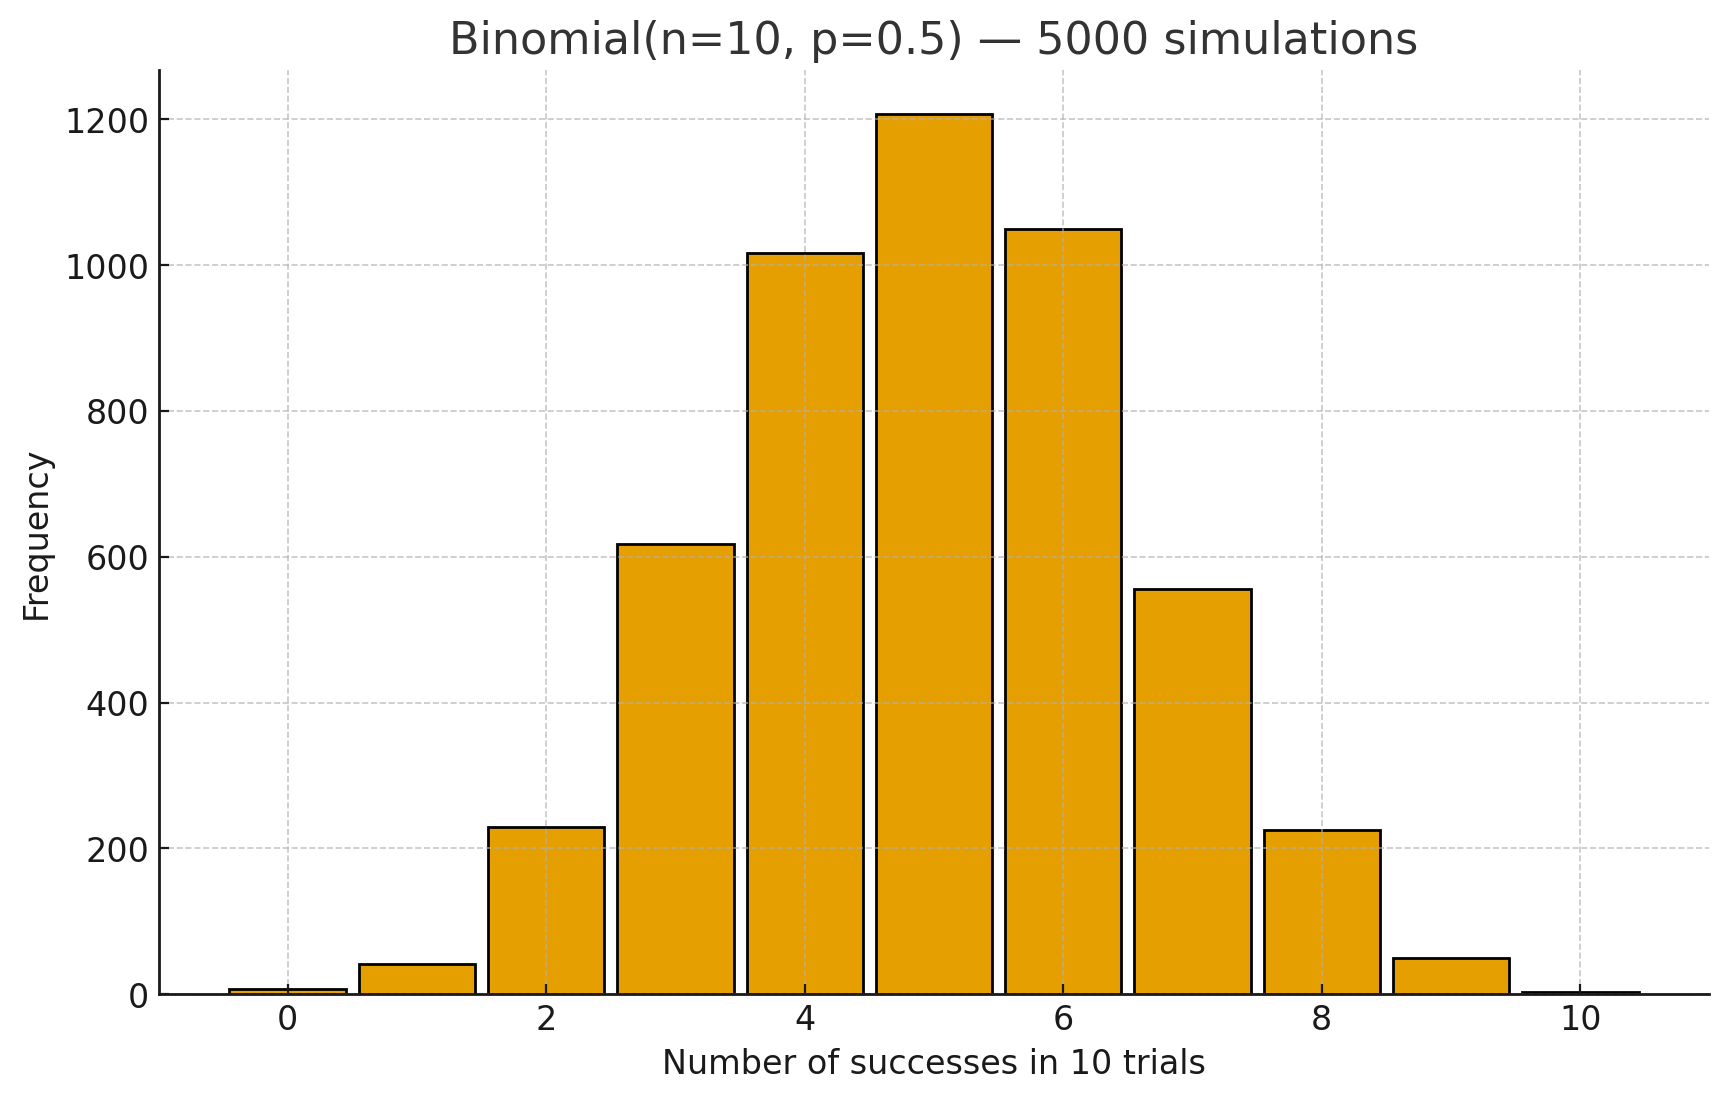

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n, p = 10, 0.5
samples = np.random.binomial(n=n, p=p, size=5000)

print(f"Mean ≈ {samples.mean():.3f}, Var ≈ {samples.var(ddof=0):.3f} (theoretical mean = {n*p}, var = {n*p*(1-p)})")

plt.figure()
plt.hist(samples, bins=range(0, n+2), edgecolor='black', align='left', rwidth=0.9)
plt.title("Binomial(n=10, p=0.5) — 5000 simulations")
plt.xlabel("Number of successes in 10 trials")
plt.ylabel("Frequency")
plt.show()

## Question 8
**Generate multiple samples from a non‑normal distribution and implement the Central Limit Theorem using Python.**

We’ll draw from an **exponential** distribution (highly skewed) and examine sample means for different \(m\). By the **CLT**, the distribution of the sample mean tends to normality as \(m\) grows.

m= 1 | mean≈0.991, sd≈0.988 (theory: mean=1, sd≈1.000)


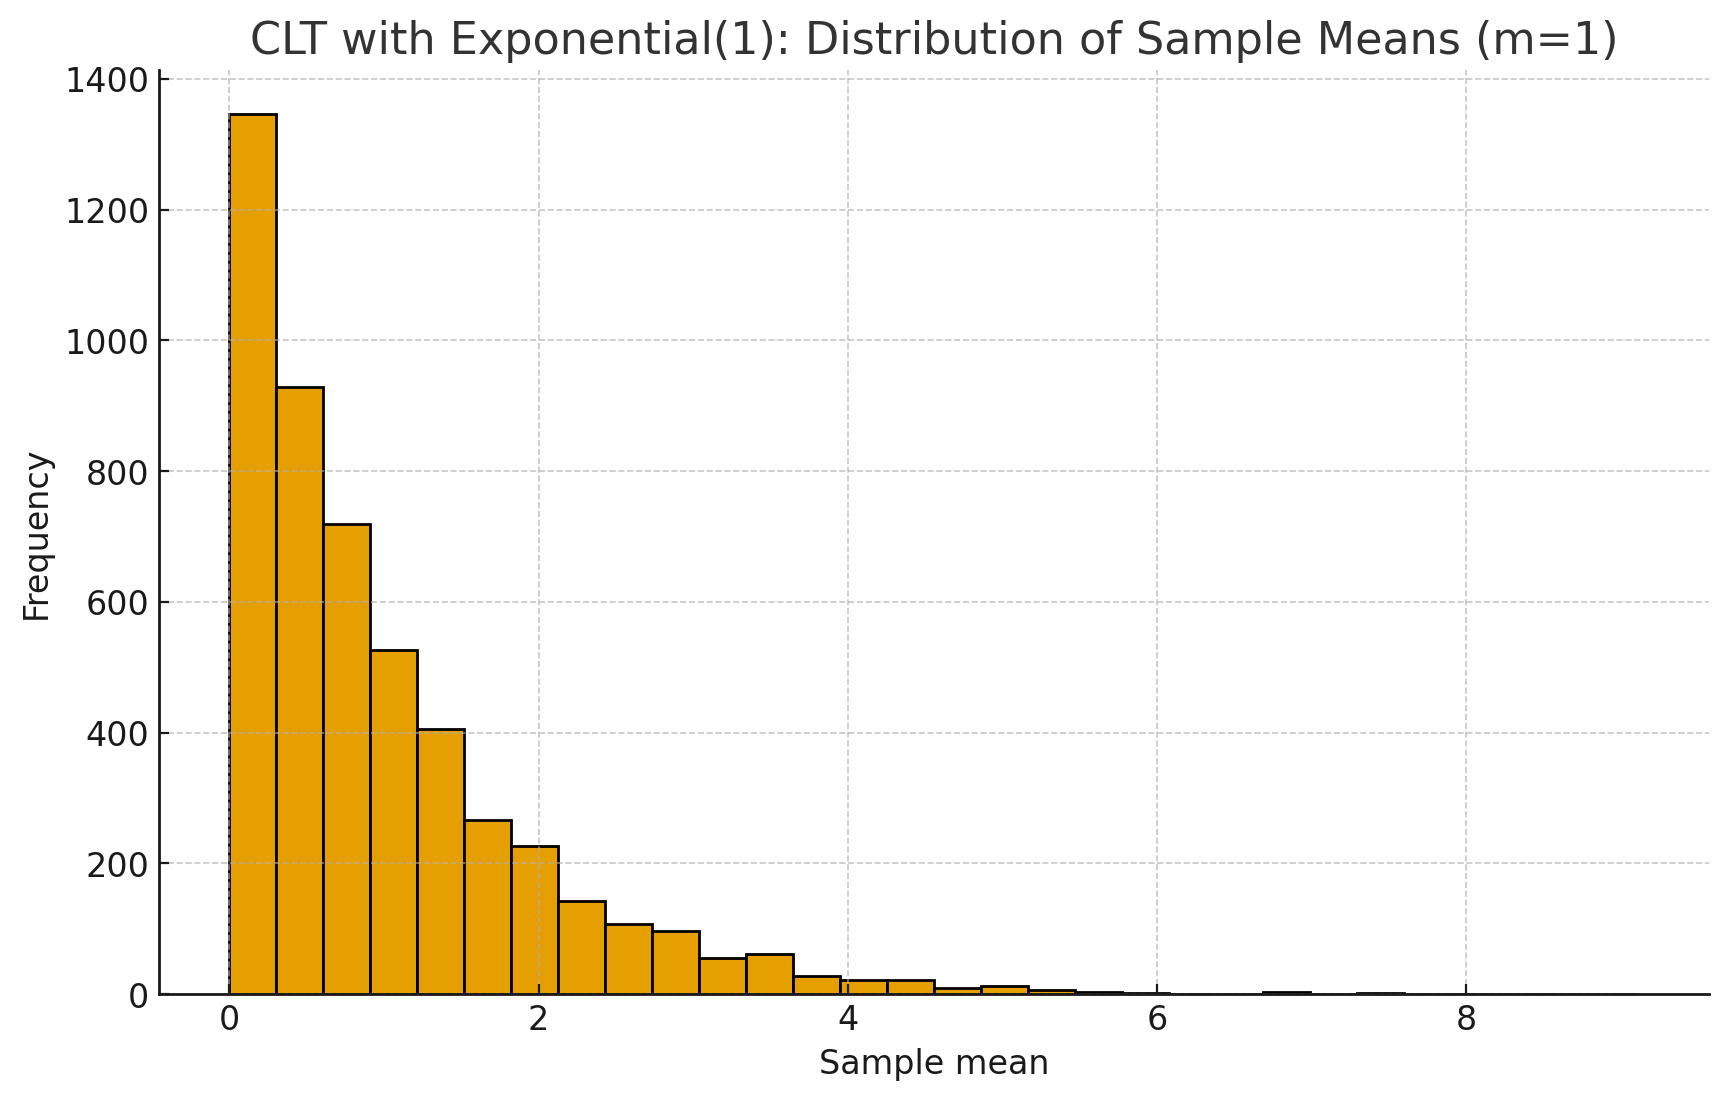

m= 2 | mean≈0.993, sd≈0.693 (theory: mean=1, sd≈0.707)


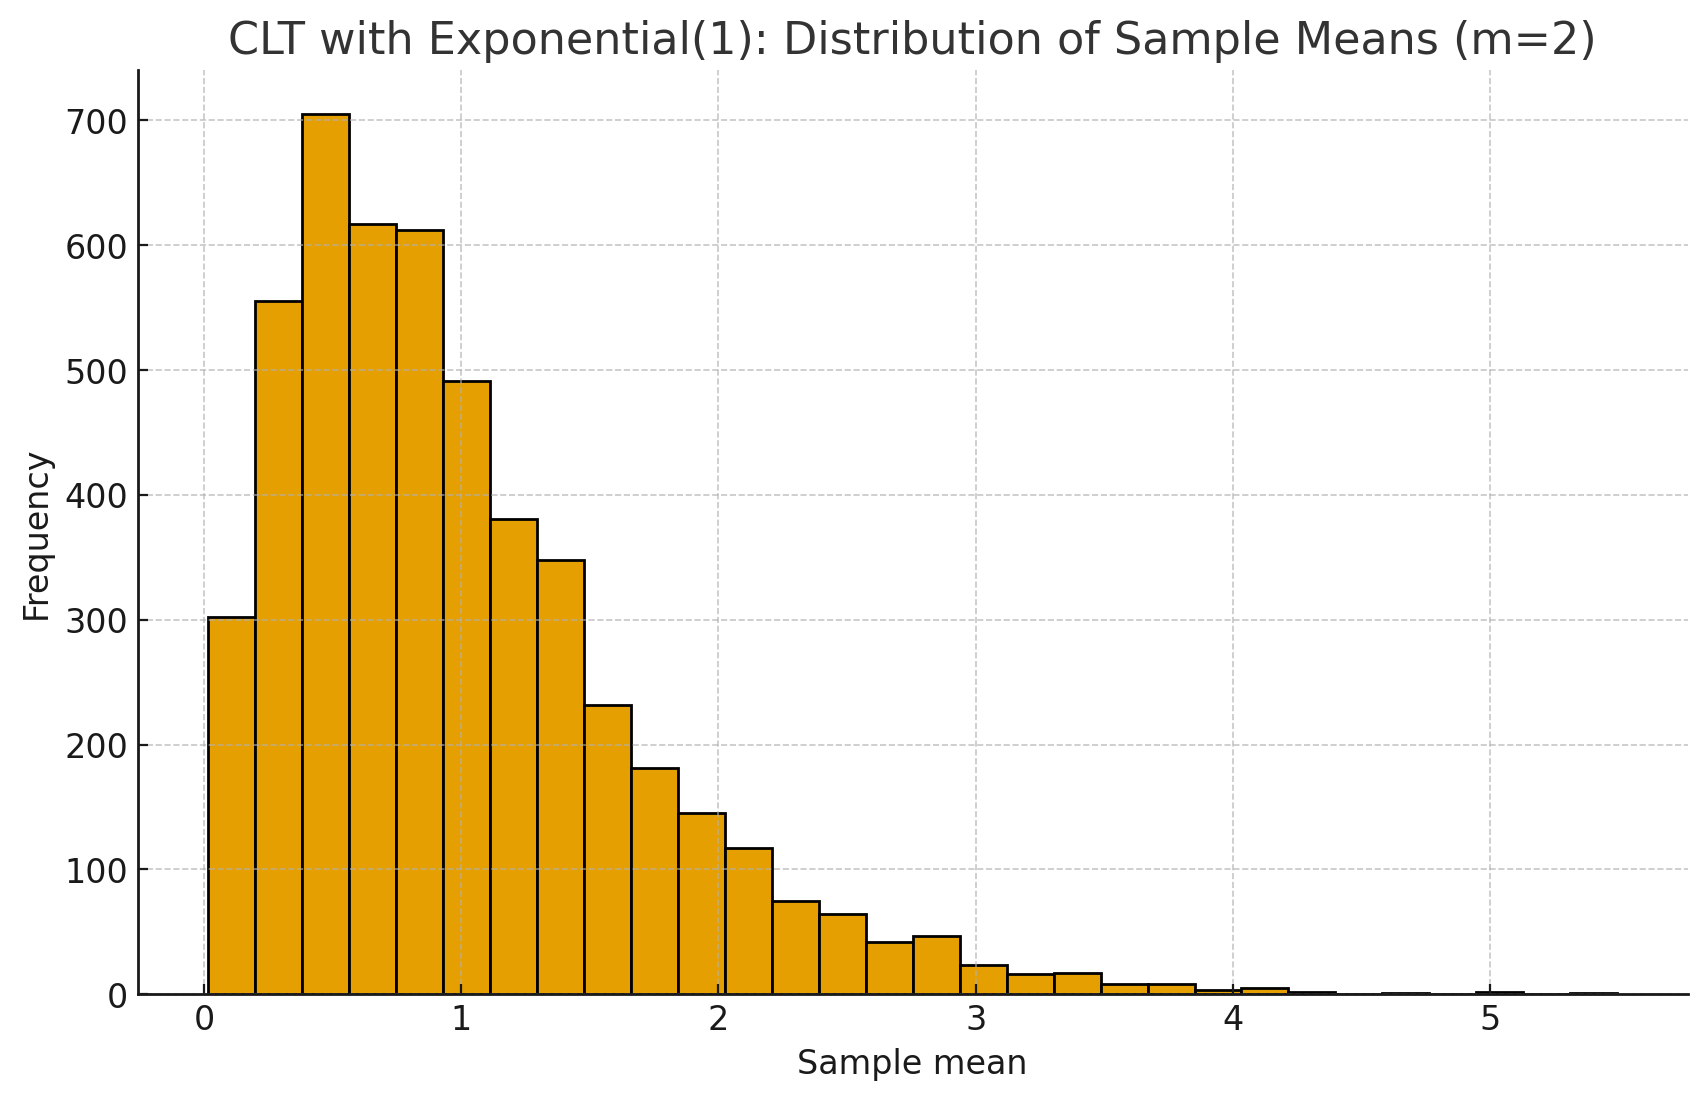

m= 5 | mean≈1.002, sd≈0.445 (theory: mean=1, sd≈0.447)


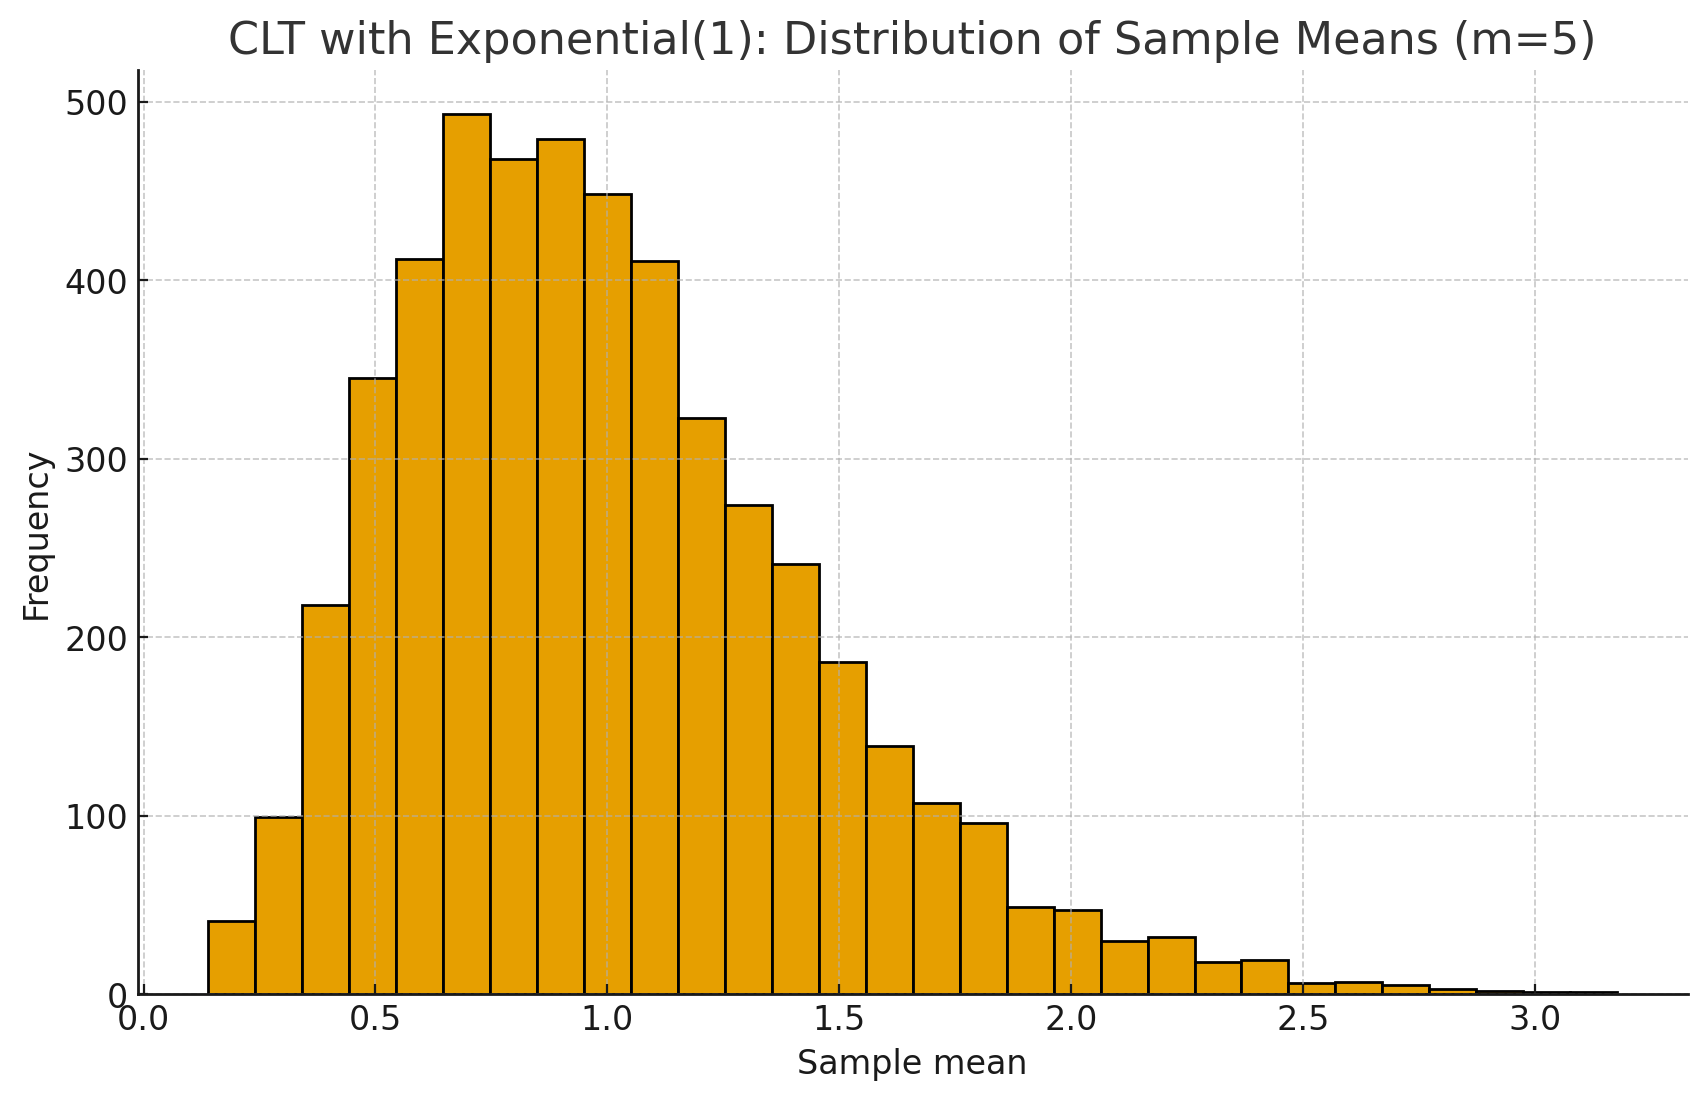

m=10 | mean≈1.002, sd≈0.316 (theory: mean=1, sd≈0.316)


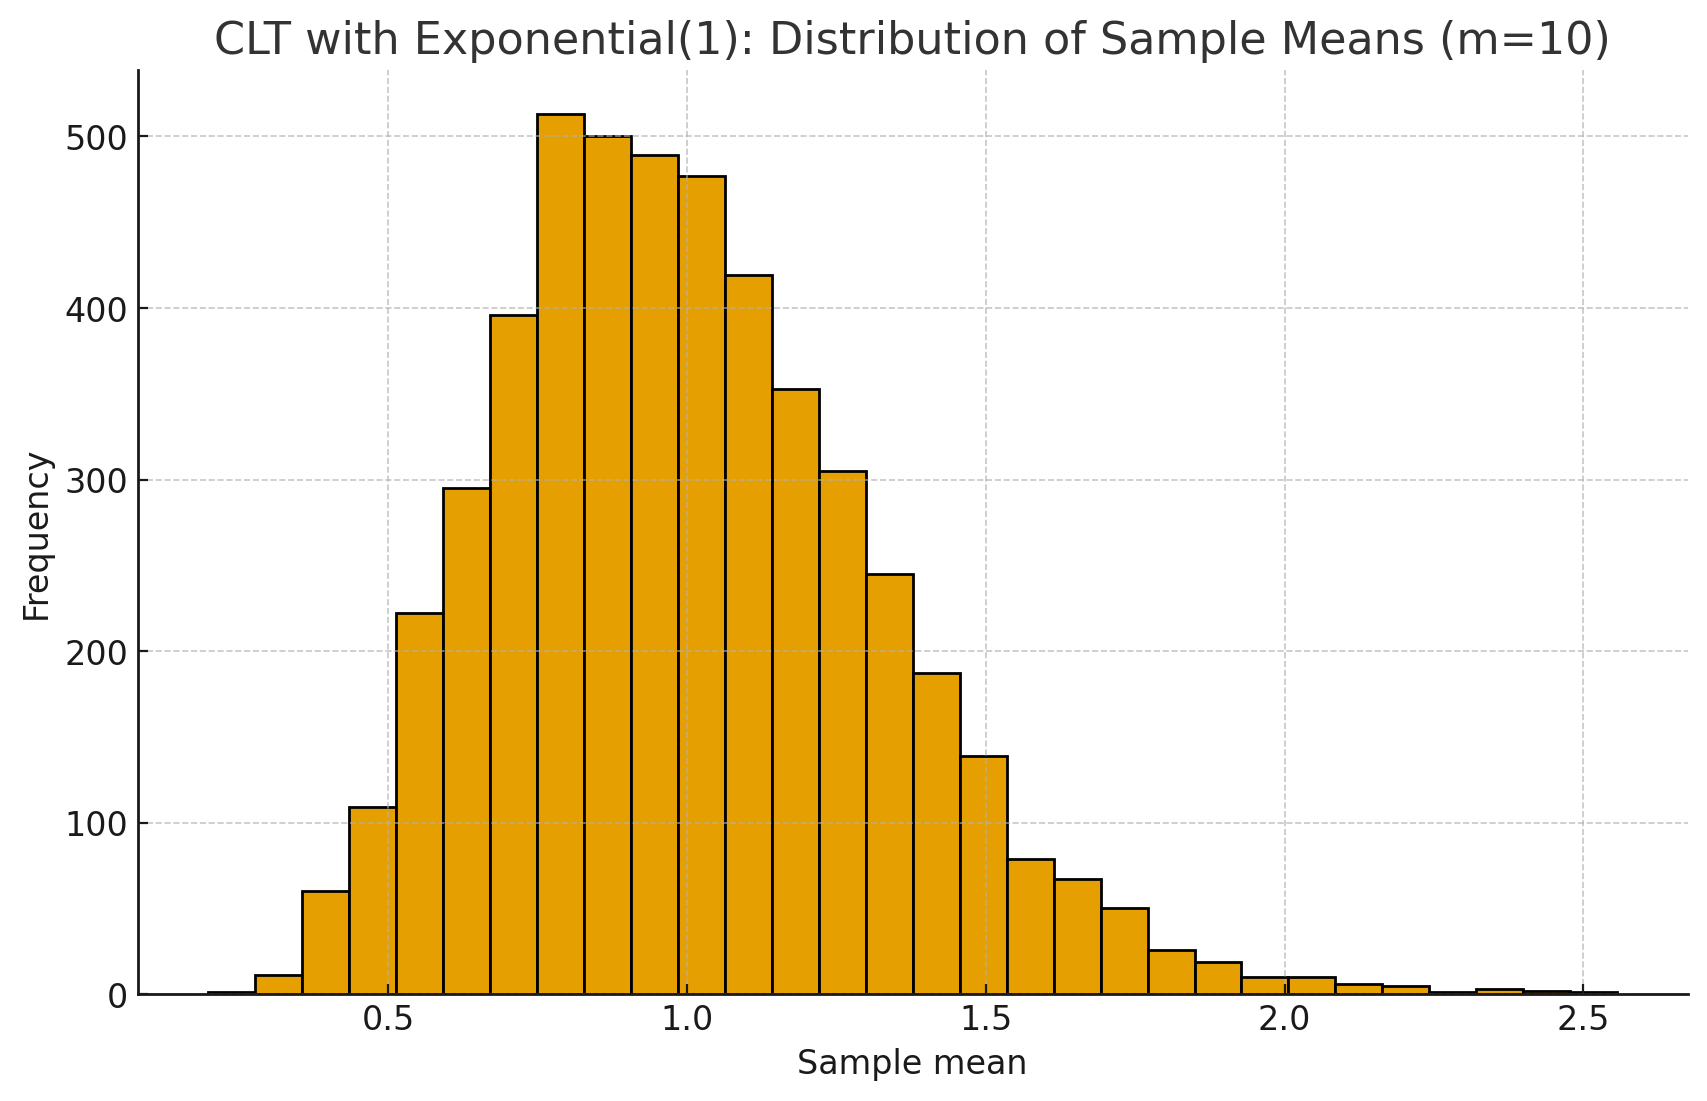

m=30 | mean≈1.001, sd≈0.182 (theory: mean=1, sd≈0.183)


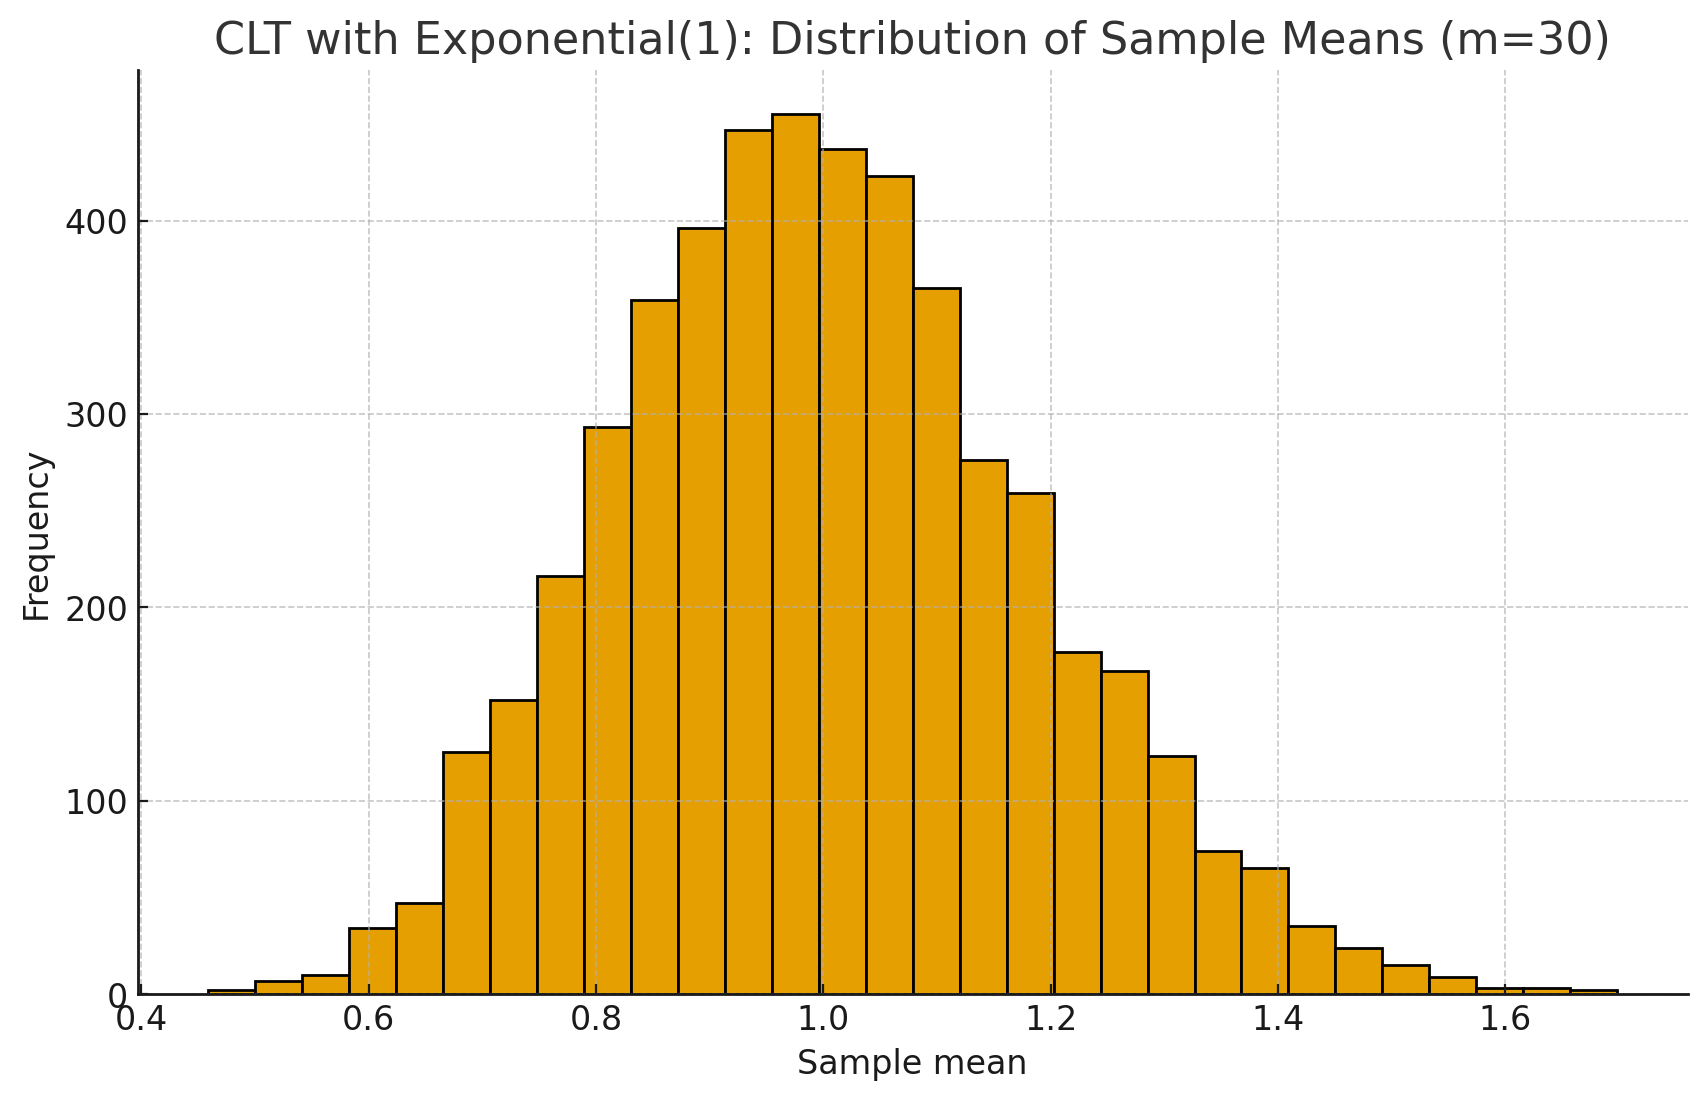

m=50 | mean≈1.000, sd≈0.140 (theory: mean=1, sd≈0.141)


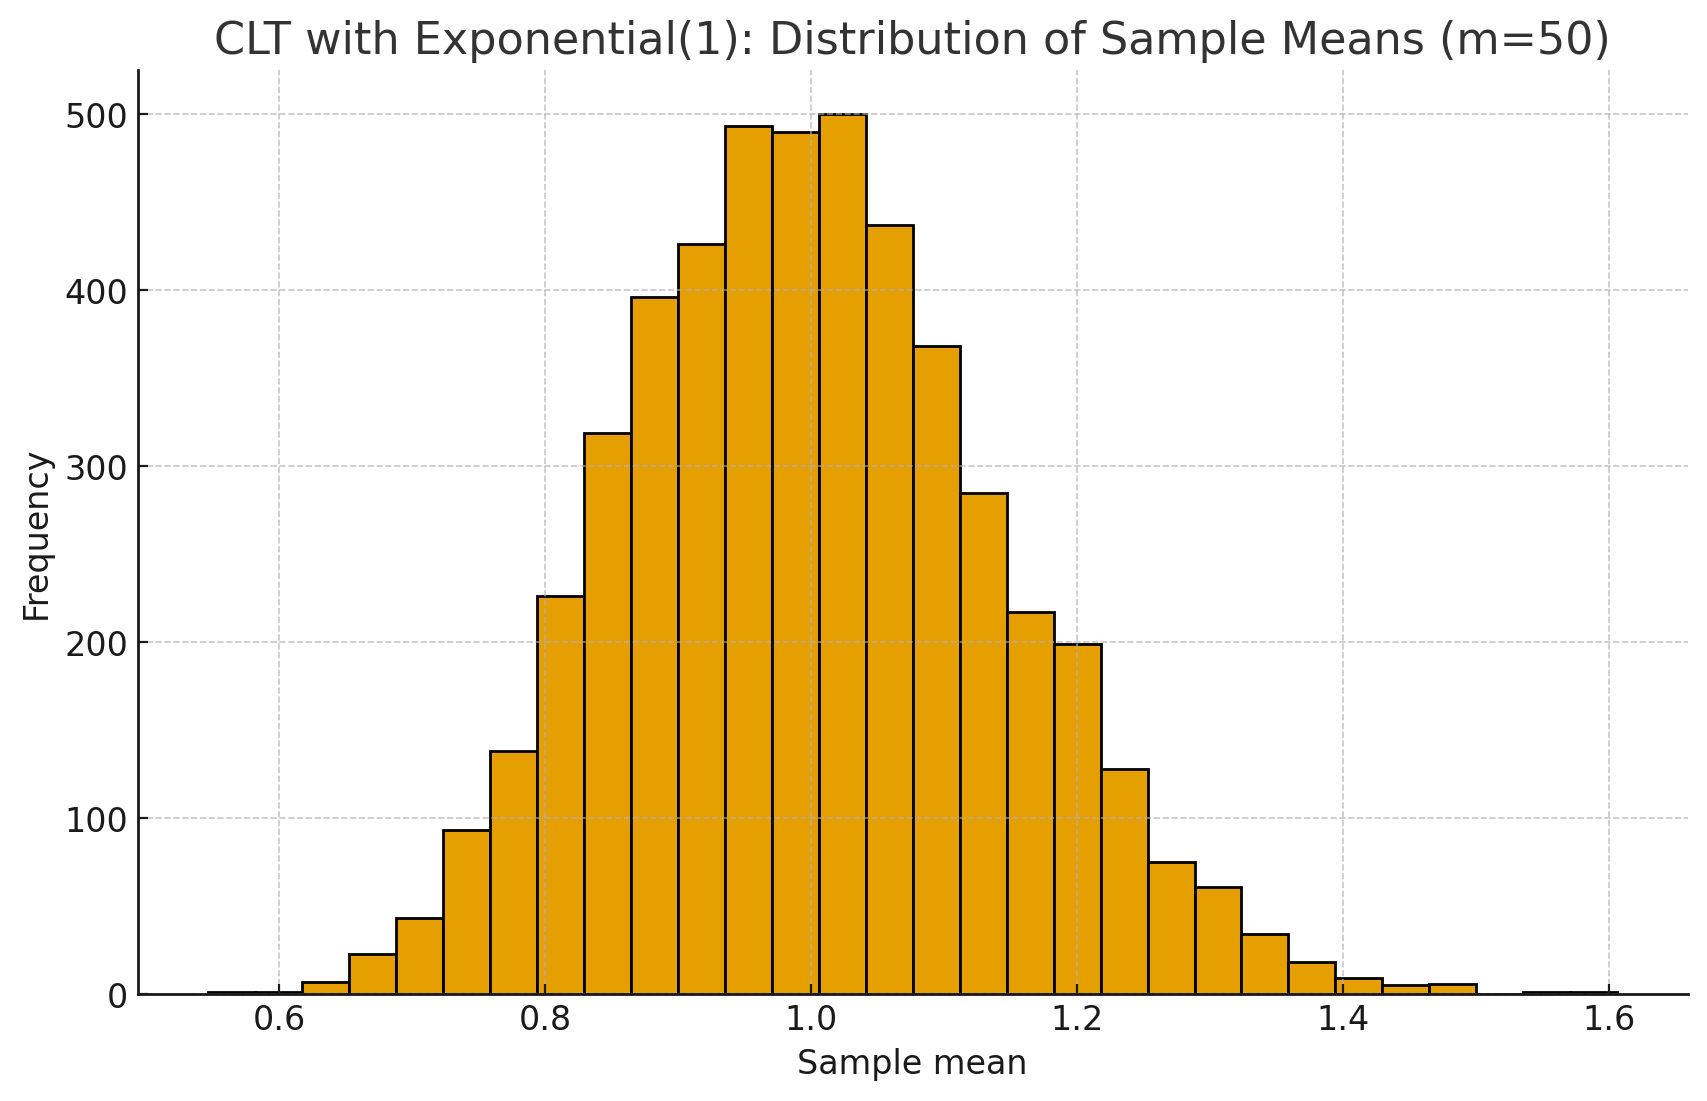

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def clt_demo(dist_sampler, m, reps=5000):
    # draw 'reps' sample means, each from a sample of size m
    means = np.array([dist_sampler(m).mean() for _ in range(reps)])
    return means

# Exponential with lambda=1 (mean=1, var=1)
dist = lambda m: np.random.exponential(scale=1.0, size=m)

sizes = [1, 2, 5, 10, 30, 50]

for m in sizes:
    means = clt_demo(dist, m)
    print(f"m={m:>2} | mean≈{means.mean():.3f}, sd≈{means.std(ddof=1):.3f} (theory: mean=1, sd≈{(1/np.sqrt(m)):.3f})")
    plt.figure()
    plt.hist(means, bins=30, edgecolor='black')
    plt.title(f"CLT with Exponential(1): Distribution of Sample Means (m={m})")
    plt.xlabel("Sample mean")
    plt.ylabel("Frequency")
    plt.show()

## Question 9
**Write a Python function to calculate and visualize the confidence interval for a sample mean.**

We provide a function that:  
- chooses a **T‑interval** if SciPy is available (unknown \(\sigma\)),  
- otherwise falls back to a **bootstrap** 95% CI.  
It also plots the sample data and the CI.

Mean = 4.090
95% CI = [3.904, 4.276] using T-interval (σ unknown)


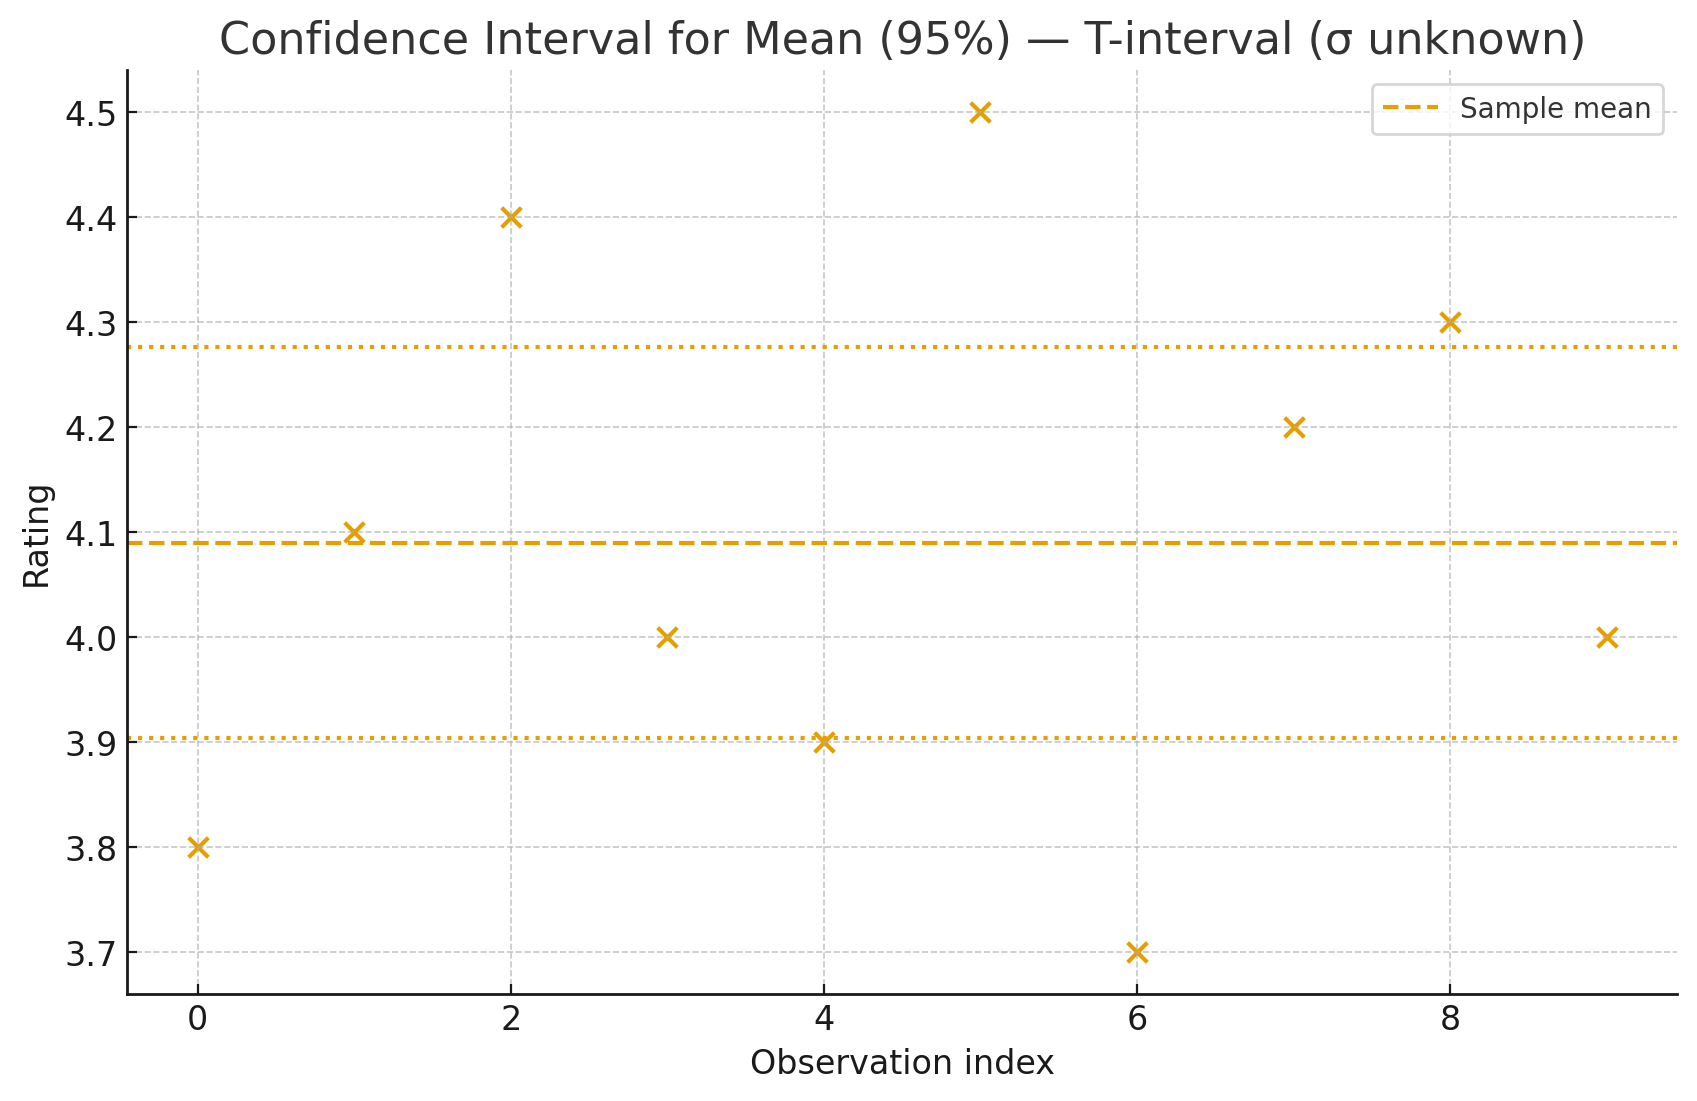

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ci_mean(x, confidence=0.95, known_sigma=None, seed=7):
    x = np.asarray(x, dtype=float)
    n = x.size
    xbar = x.mean()
    se = None
    low = high = None
    method = ""

    try:
        from scipy import stats
        if known_sigma is not None:
            se = known_sigma/np.sqrt(n)
            z = stats.norm.ppf(0.5 + confidence/2.0)
            low, high = xbar - z*se, xbar + z*se
            method = f"Z-interval (σ known={known_sigma})"
        else:
            se = x.std(ddof=1)/np.sqrt(n)
            tcrit = stats.t.ppf(0.5 + confidence/2.0, df=n-1)
            low, high = xbar - tcrit*se, xbar + tcrit*se
            method = "T-interval (σ unknown)"
    except Exception:
        # Bootstrap fallback
        rng = np.random.default_rng(seed)
        B = 10000
        boots = rng.choice(x, size=(B, n), replace=True).mean(axis=1)
        low, high = np.percentile(boots, [(1-confidence)/2*100, (1+confidence)/2*100])
        method = "Bootstrap percentile CI"

    return (low, high, xbar, method)

# Example dataset (e.g., customer ratings out of 5)
ratings = np.array([3.8, 4.1, 4.4, 4.0, 3.9, 4.5, 3.7, 4.2, 4.3, 4.0])

ci_low, ci_high, mean_val, method_used = ci_mean(ratings, confidence=0.95)

print(f"Mean = {mean_val:.3f}")
print(f"95% CI = [{ci_low:.3f}, {ci_high:.3f}] using {method_used}")

plt.figure()
plt.scatter(range(len(ratings)), ratings, s=50)
plt.axhline(mean_val, linestyle='--', label='Sample mean')
plt.axhline(ci_low, linestyle=':')
plt.axhline(ci_high, linestyle=':')
plt.title(f"Confidence Interval for Mean (95%) — {method_used}")
plt.xlabel("Observation index")
plt.ylabel("Rating")
plt.legend()
plt.show()

## Question 10
**Perform a Chi‑square goodness‑of‑fit test using Python to compare observed and expected distributions, and explain the outcome.**

*Scenario:* A support desk classifies tickets into 4 categories. Historically the distribution is  
\([0.40, 0.30, 0.20, 0.10]\). In a recent week we observed counts \([82, 70, 38, 20]\) out of \(N=210\). Test whether the observed distribution matches history at \(\alpha=0.05\).

In [ ]:
import numpy as np

observed = np.array([82, 70, 38, 20])
N = observed.sum()
expected_probs = np.array([0.40, 0.30, 0.20, 0.10])
expected = N * expected_probs

chi2_stat = np.sum((observed - expected)**2 / expected)
df = observed.size - 1

pval = None
used = ""
try:
    from scipy import stats
    pval = 1 - stats.chi2.cdf(chi2_stat, df=df)
    used = "SciPy chi2 CDF"
except Exception:
    pval = None
    used = "p-value not computed (SciPy unavailable). Report chi2 and compare to critical table."

print(f"Observed: {observed.tolist()} (N={N})")
print(f"Expected: {expected.tolist()}")
print(f"Chi-square statistic = {chi2_stat:.3f}, df = {df}")
print(f"p-value = {pval if pval is not None else 'N/A'} [{used}]")

if pval is not None:
    if pval <= 0.05:
        print("Decision: Reject H0 — the observed distribution differs from the historical proportions.")
    else:
        print("Decision: Fail to reject H0 — the observed distribution is consistent with history.")
else:
    print("Decision via critical value: compare χ²=%.3f with χ²_{0.95, %d}. If χ² exceeds the critical value, reject H0." % (chi2_stat, df))

Observed: [82, 70, 38, 20] (N=210)
Expected: [84.0, 63.0, 42.0, 21.0]
Chi-square statistic = 1.254, df = 3
p-value = 0.7400916838870886 [SciPy chi2 CDF]
Decision: Fail to reject H0 — the observed distribution is consistent with history.


---
**End of notebook.**  
This notebook includes detailed theory answers (Q1–Q5) and executed Python code with outputs (Q6–Q10).